<style>
    .div-1 {
        background-color: #EBEBEB;
    }
    
    .div-2 {
    	background-color: #ABBAEA;
    }
    
    .div-3 {
    	background-color: #FBD603;
    }
</style>

<div align="right"><img src='https://blockchain4talent.com/wp-content/uploads/2021/09/a58ab6e0efdce2743f592019683b00c2.jpeg'>

<h1 style="color:#2596be;font:luminary;text-align:center;"><i>Cisco Project</i></h1>

<div class=“alert alert-success”>

<h2 style="color:#2596be;">Project's Description</h1> 

This team was tasked to build a model that can predict the sales for Cisco. Our goal is to explore historical cisco sales to Texas public agencies (school districts, government agencies, municipalities, etc) to present to people who might want to buy into the cisco ecosystem if it is a good idea going forward. This can include potential stock investors or customers or even people looking to train to properly implement Cisco equipment. Assessing Cisco’s strength selling in the state can assure potential buy-in for all those parties. Included in this information will be projected sales a year in the future, with additional 2 and 5 year forecasts.

In this project we will focus on __Time Series Analysis__ and we'll try to create forecast model that can predict future sales. We expect to hit difficulties during modeling process, as the beginning of pandemic led to anomaly increase of telecommunication sales followed by significant drop in sales after it. That anomaly will "confuse" the models making them over- or underestimate sales dramatically depending of the time period included to train the model. 

In [25]:
# project modules
import src.wrangle as wr
import src.explore as ex
import src.summaries as s
import src.ts_models_d as tsmd

# ignore warnings
import warnings
warnings.filterwarnings('ignore')
# makes vizualizations better in a jupyter notebook
%config InlineBackend.figure_format = 'retina'

<h3 style="color:#2596be;">Acquire and Prepare</h3> 

We acquired the data from the [Texas Open Data Portal](https://data.texas.gov/dataset/OFFICIAL-DIR-Cooperative-Contract-Sales-Data-Fisca/w64c-ndf7). The origin of the data is 	[Texas Department of Information Resources](	https://dir.texas.gov/). The data file contains information about DIR Cooperative Contract Sales. To get the information about Cisco we filtered the data by vendor name.

- Our first cleaning step was dropping the columns with null values only and renaming columns into programming friendly format simply by replacing whitespaces with underscores and making them lower case. Our next step was dropping columns with no value for exploration or modeling purposes (for example, `vendor_adress`, `reseller_phone` etc.)
- We have created additional features based on the `order_date` information:
    `year` : year
    `quarter`: quarter
    `month`: month number
    `month_name`: month name
    `day_of_week`: day of week number
    `day_name`: day of week name
    `day_of_year`: day of the year
    `week`: week of the year number

The original data contains the accounting information about every transaction where every row represents a transaction. One company could have many transactions per day, including those where the `purchase_amount` was equal to zero, one cent or being negative. We have created as well a summary data frame whith the final `purchase_amount` per day per company. This droppes the number of rows from 261,886 to 34,401 rows. 

- To adoid data leakagee divided the data into train and test sets. 
- After the exploration we split the test set into validation and test sets as well.
- __The target variable of the project is ```purchase_amount```__


<h3 style="color:#2596be;">Data Exploration</h3> 

Before we jump into Data Exploration, let's have a look at the customer types represented in our data. We can see that most orders are made by Local Goverments, followed by  Independent School Districts, Higher Education Institutions and State Agencies. Other public agencies make only 0.6% orders.

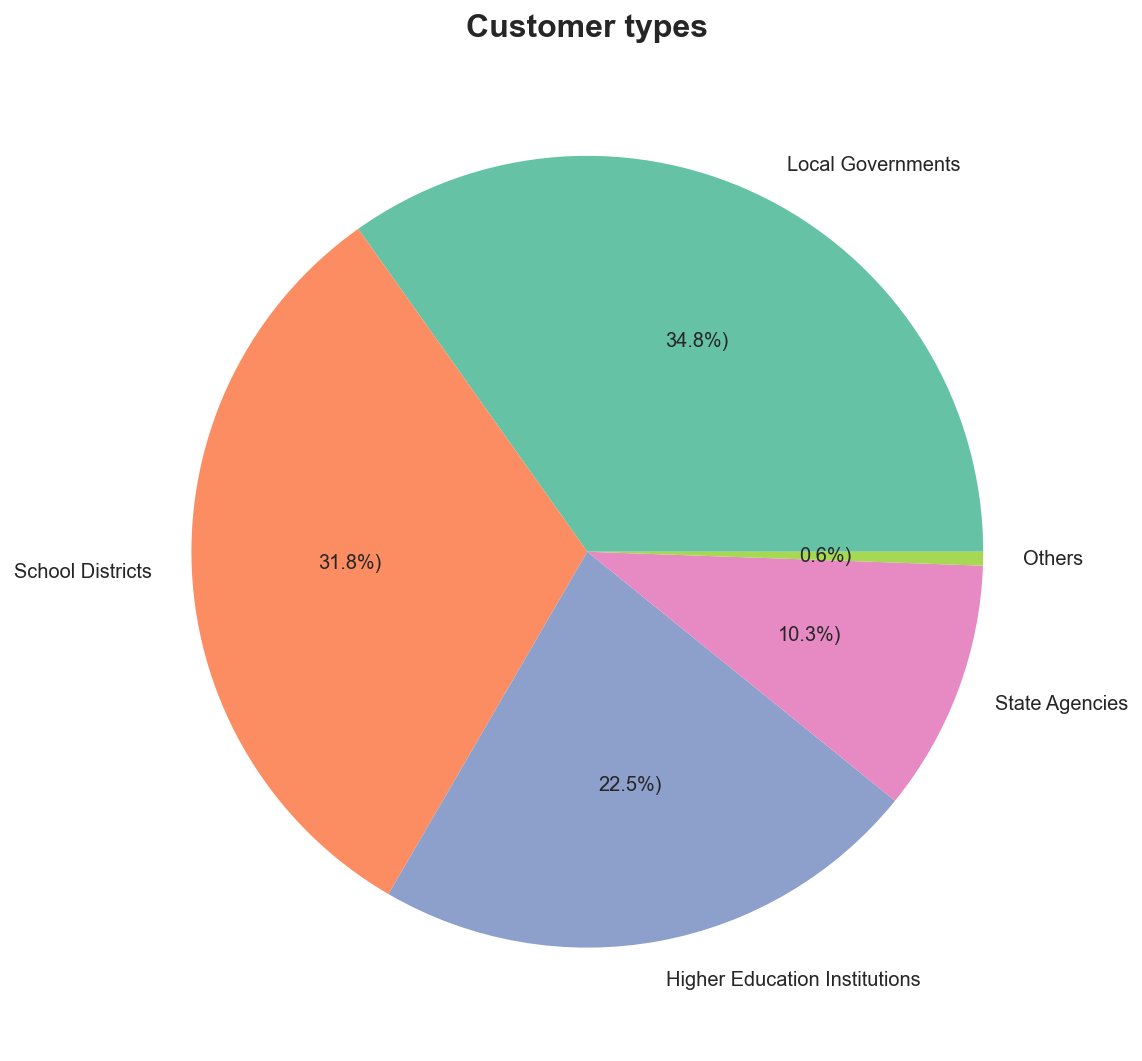

In [216]:
# call pie chart with 
ex.viz_customer_types()

### 1. Is there any significant difference in sales by the day of the week?

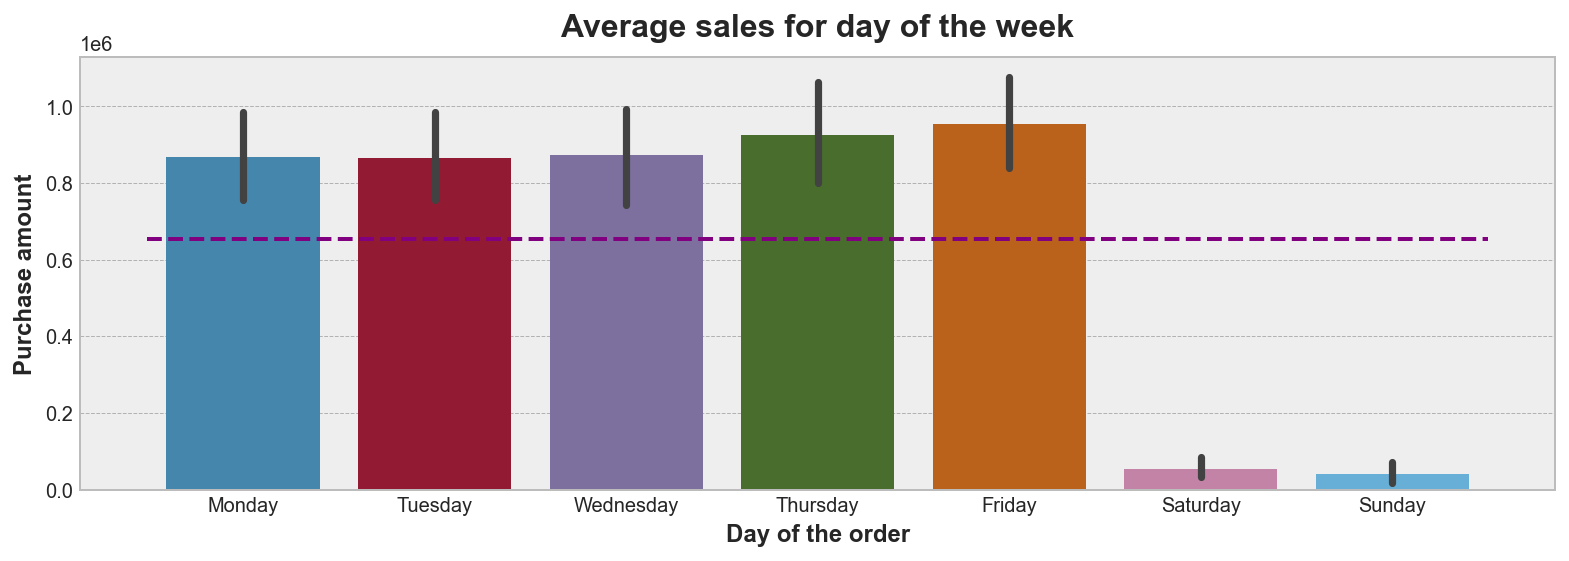

In [133]:
# visualize average sales per day
ex.q1_viz()

We can see a significant difference in sales between week days and weekends. Some orders are placed on weekends. Since the goverment insitutions don't work on Sunday, it might happen when resellers put their orders right before Monday. The daily sale's average is plotted as a horizontal purple dashed line. 
Based on this graph we want to run two statistical test. First one going to check if the mean of sales in every day differce from total mean of sales. Second test will check if means of sales are different Monday through Wednesday as on the chart they look similar.

For statistical tests:

- $H_0:$ stands for 'Null hypothesis’ 
- $H_a:$ stands for 'Alternative hypotheses'

- All statistical tests run for the **95% Confidence level**.
- The **significance level** (alpha) is set to **0.05**
- If the p-value is smaller than 0.05 we reject the Null hypothesis.

#### Test #1

$H_0$: There is no significant difference in means of sales between certain day of the week and average daily sales.

$H_a$: There is a significant difference in means of sales between certain day of the week and average daily sales.

We use 1 sample T-test to compare mean of an independent sample against the population mean.

In [148]:
# call ttest for every day of the week
ex.q1_ttest()

,T-value,P-value
Day,,
Monday,3.50,0.00
Tuesday,3.41,0.00
Wednesday,3.21,0.00
Thursday,4.02,0.00
Friday,4.73,0.00
Saturday,-43.01,0.00
Sunday,-44.18,0.00


All days showed a significant difference. For every day of the week we reject the null hypothesis.

#### Test #2

$H_0$: There is no significant difference in means of sales during work days Mon through Wed


$H_a$: There is a significant difference in means of sales during work days Mon through Wed

In [149]:
ex.q1_anova()

Variances are equal. Use ANOVA
Fail to reject null hypothesis
There is no significant difference in means of sales during work days Monday through Wednesday


The statistical test showed that average sales on Monday, Tuesday and Wednesday don't have significant difference.

#### Takeaways:
- All sales per day of the week significantly differ from the average daily sales. 
- Week days have higher sales than the average and weekend days almost don't have sales. 
- Monday, Tuesaday and Wednesday seem to have same average amount of sales. 
- Friday has the higher average sales amount among all days of the week.

### 2. Is there any significant difference in sales by the month?

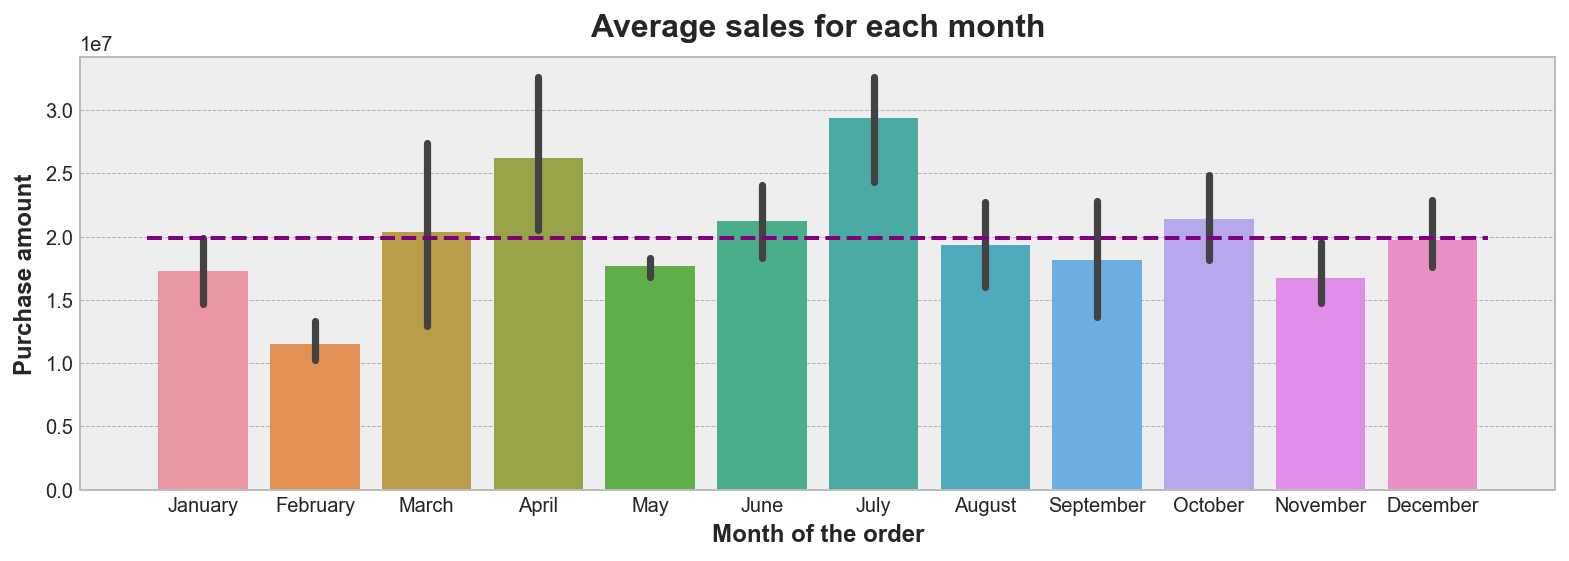

In [166]:
# show average sales per month
ex.q2_viz()

__One sample T-test to check if the average sales per month differ from average monthly sales.__

$H_0$: There is no significant difference in means of sales per month and average monthly sales.

$H_a$: There is a significant difference in means of sales per month and average monthly sales.

In [179]:
# run statistical test for every month
ex.q2_ttest()

,T-value,P-value
Month,,
July,3.63,0.04
April,1.66,0.19
October,0.74,0.51
June,0.71,0.53
March,0.10,0.92
December,-0.12,0.91
August,-0.27,0.80
September,-0.59,0.60
January,-1.80,0.17


#### Takaways:
- The highest sales are happening in July, followed by April, October and June.
- The lowest sales happen on February.
- March has almost the same results as average sales, but there was peak in sales on March, 2020 when pandemic just started, it might happened that March is typically low on sales.
- April results might be affected by beginning of pandemic, too.

### 3. Is there any significant difference in sales by the quarter?

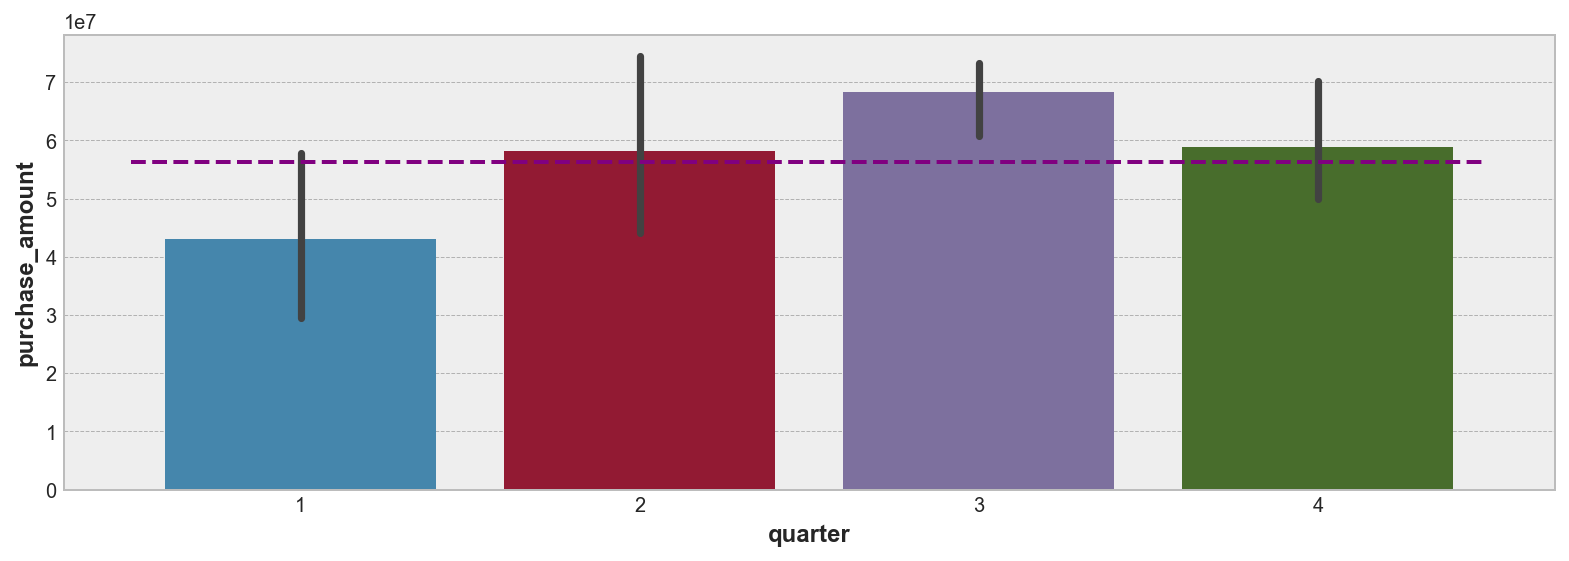

In [184]:
# visualize quarters
ex.q3_viz()

Looks like first and third qurters significantly different  from the quarterly mean of sales. In the fist quarter sales are much lower and in the third quarder they are higher. Let's check this statement with the statistical test. We'll run again one sample T-test to compare mean of the sample against the mean of the population.

$H_0$: The quarterly sales of each quarter are not significantly different from overall quarterly sales.

$H_a$: The quarterly sales of each quarter are significantly different from overall quarterly sales.

In [185]:
# run t-test
ex.q3_ttest()

,T-value,P-value
Quarter,,
1.00,-1.60,0.19
2.00,0.23,0.84
3.00,3.06,0.06
4.00,0.46,0.68


Descpite the obvious difference in the quarterly sales on the bar chart, statistical test disproved this statement. We fail to reject the null hypothesis because the difference in means is not significant.

#### Takeaways:
- Highest sales are in the 3rd quarter.
- Lowest sales are in the 1st quarter.
- Average qurterly sales per each quarter are not significantly different from the overall average quarterly sales.

### 4. Is there any significant change in monthly sales percentage in our data?

Now let's have a closer look into monthly percentage change in total sales. The graph below shows clear spike in total sales in March, 2020, exactly in the beginning of COVID-2019 pandemic.

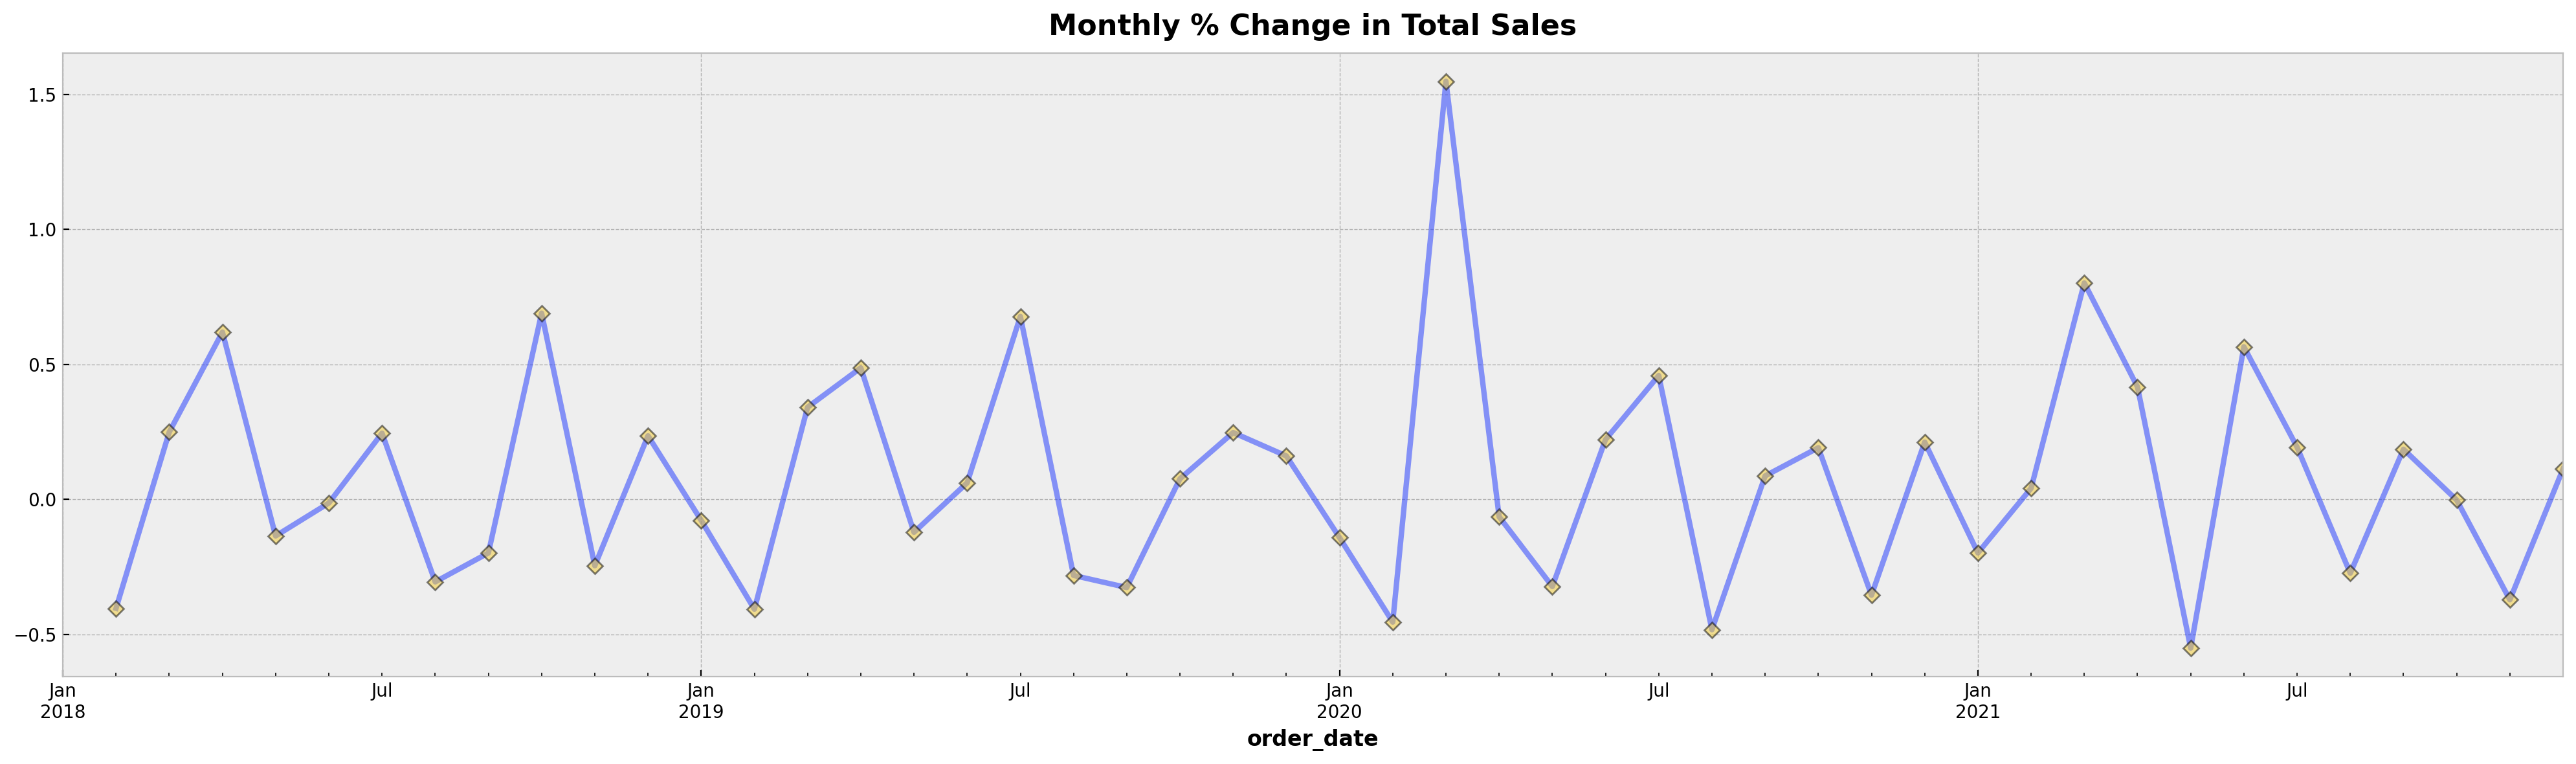

In [15]:
# show monthly % change
ex.q4_viz()

### Takeaway:
In the beginning of the pandemic there was a spike in sales.

### 5. Any other surprises during pandemic beside the sales increase?
- We know that the covid-19 global pandemic altered business in the United States among countries of the world. Certainly Cisco Systems' sales in the state of Texas would be effected somehow. W set out to see if there would be large anamolous activities around the year 2020. First, we found that there is an enormous jump in quantities of orders from customers. This jump occured on Janurary 2, 2020. Texas Health and Human Services Commission purchased 3,767,123 units of something and 865,822 unites of something else. What were the things purchased? We cannot say from this data but considering the first order had a price of  0.00186𝑝𝑒𝑟𝑢𝑛𝑖𝑡𝑎𝑛𝑑 0.00085 per unit, we speculate that it might be licenses for cisco connect, Cisco System's VPN service.

- We found that a large purchase order like this is made for Texas Health and Human Services periodically, but the purchase is limited to around 1 million somethings. This purchase probably had to do with foresight regarding what could come given the brewing pandemic which was being reported in China.

- You may follow the following graphs to see the findings

__Notice the large order quantity outlier__

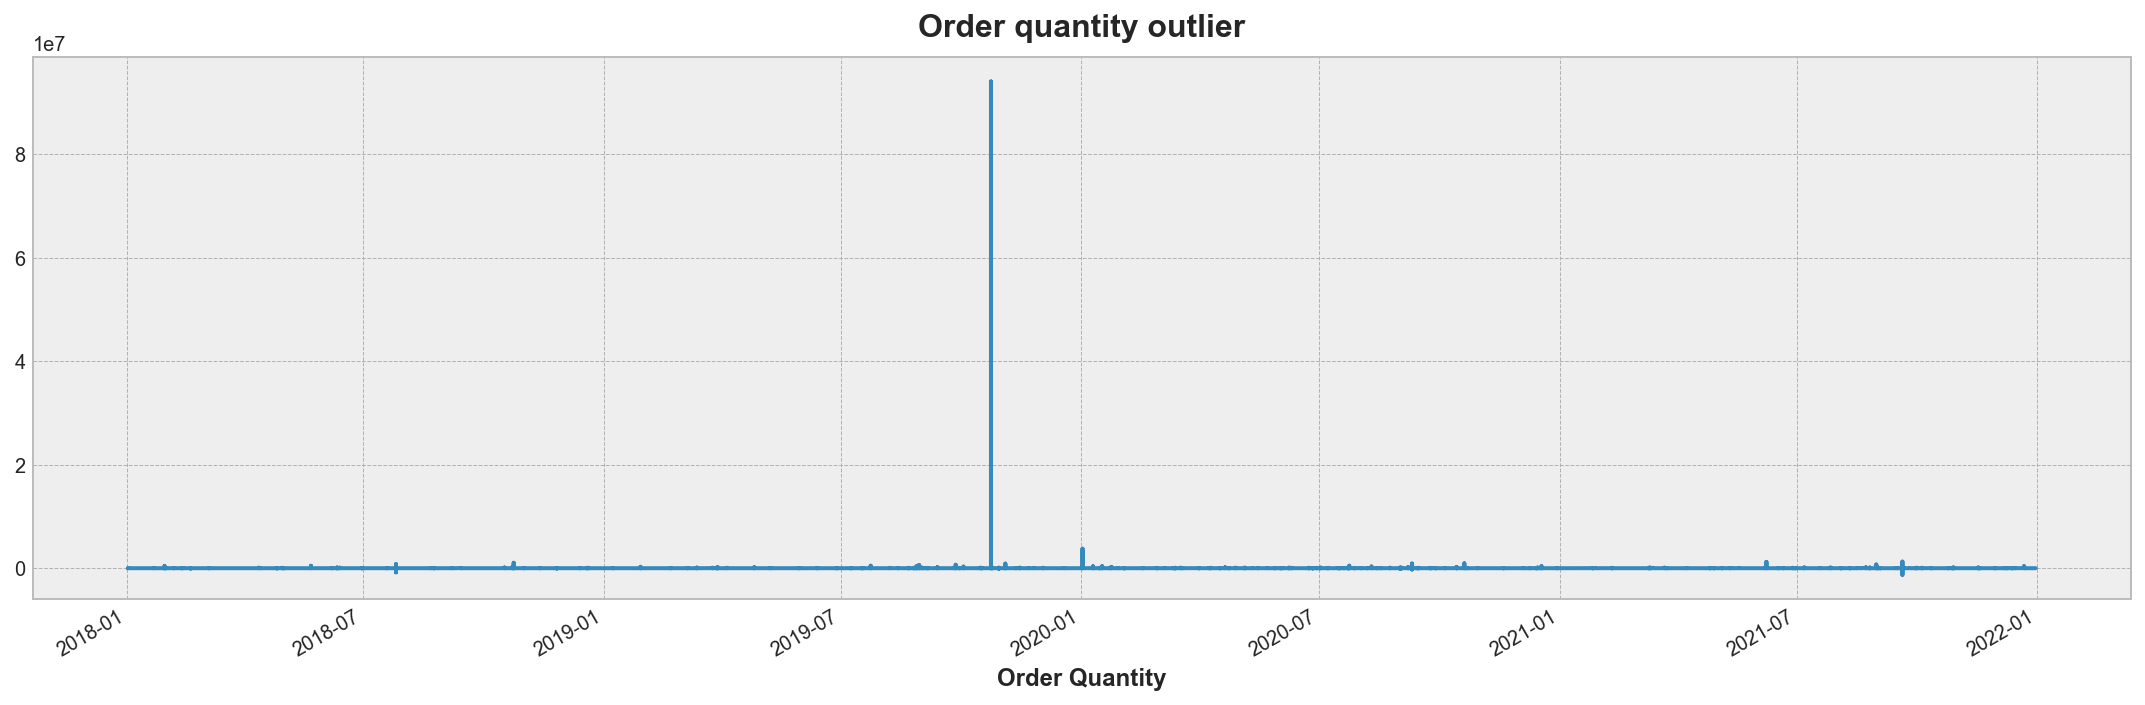

In [195]:
# show order quantity outlier
ex.q5_vizA()

Texas Health and Human Services orders.

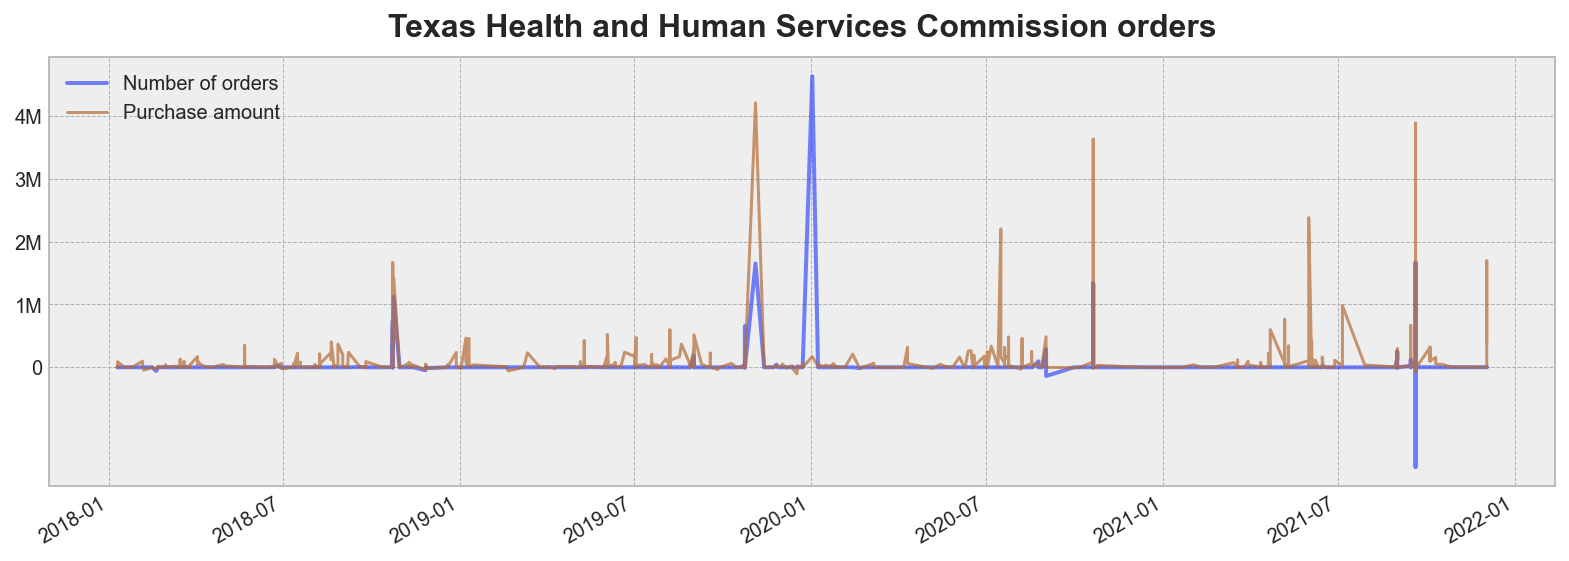

In [205]:
# show the orders and payments history for THHS
ex.q5_thhsc()

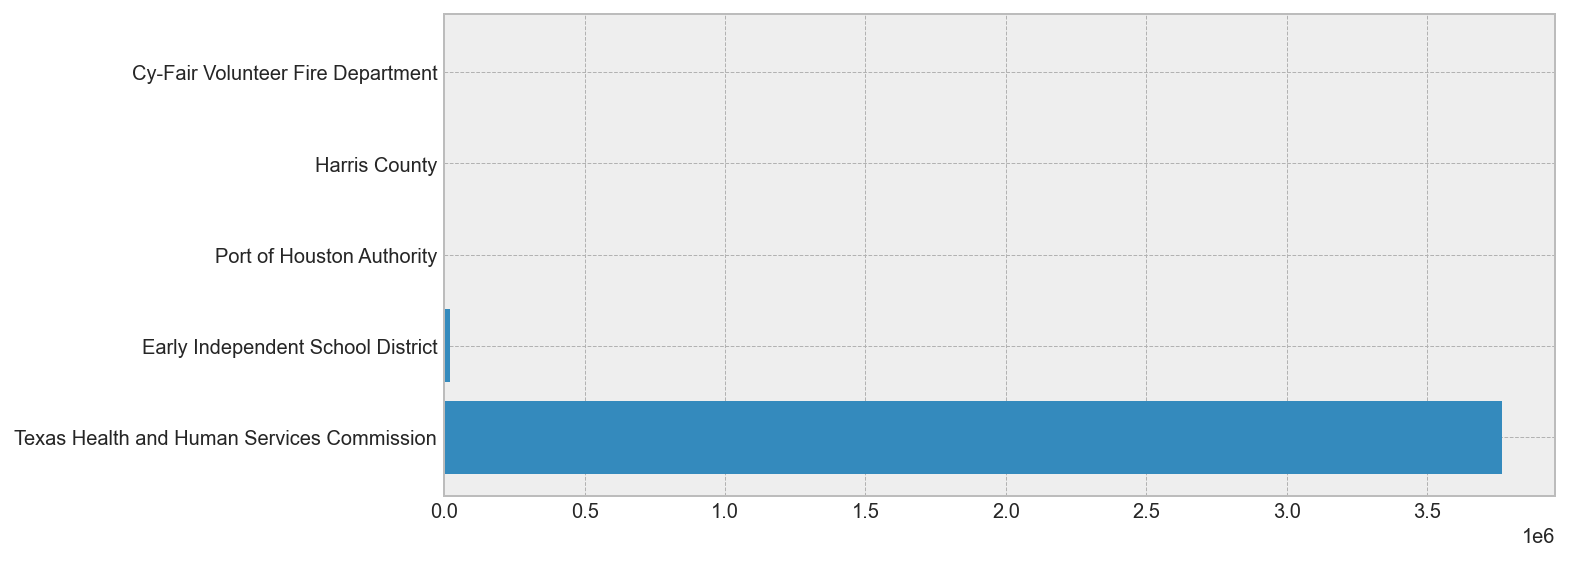

In [206]:
# show the orders on Jan, 2 2020
ex.q5_vizC()

We can see that Texas Health and Human Services Commission purchased close to 4 million somethings from Cisco Systems one time, outside of any predictable pattern

<h3 style="color:#2596be;">Data Exploration Takeaways</h3> 

- The Cisco's customers represented in DIR data set are divided into following groups:
    * Local Governments - 34.82%
    * Independent School Districts - 31.80 %
    * Higher Education Institutions - 22.54%
    * State Agencies - 10.27%
    * Other public agencies - 0.56%
    
__Daily sales__
- All sales per day of the week significantly differ from the average daily sales.
- Week days have higher sales than the average and weekend days almost don't have sales.
- Monday, Tuesaday and Wednesday seem to have same average amount of sales.
- Friday has the higher average sales amount among all days of the week.

__Monthly sales__
- The highest sales are happening in July, followed by April, October and June.
- The lowest sales happen on February.
- March has almost the same results as average sales, but there was peak in sales on March, 2020 when pandemic just started, it might happened that March is typically low on sales.
- April results might be affected by beginning of pandemic, too.

__Quarterly sales__
- Highest sales are in the 3rd quarter.
- Lowest sales are in the 1st quarter.
- Average qurterly sales per each quarter are not significantly different from the overall average quarterly sales.

__Pandemic observations__
- In the beginning of the pandemic there was a spike in sales.

<h3 style="color:#2596be;">Time Series Modeling</h3> 

To prepare the data set for time series modeling we created the data frame that contains the information only about the sale's date and amount. The `purchase_amount` is the total sale number by the end of the day. At the removed all information about customers and customer types.

In [226]:
# show first 3 rows of our train data
tsmd.X_train.head(3)

,purchase_amount
order_date,
2018-01-02,"171,192.78"
2018-01-03,"102,080.14"
2018-01-04,"181,355.01"


We left the train set the same. It includes data till the end of 2021. We split our test set into validate and test sets. The validate set has data January till June, 2022. The test set contains information about sales in time period July - November, 2022.

Let's have a quick look how sales are changing through the time.

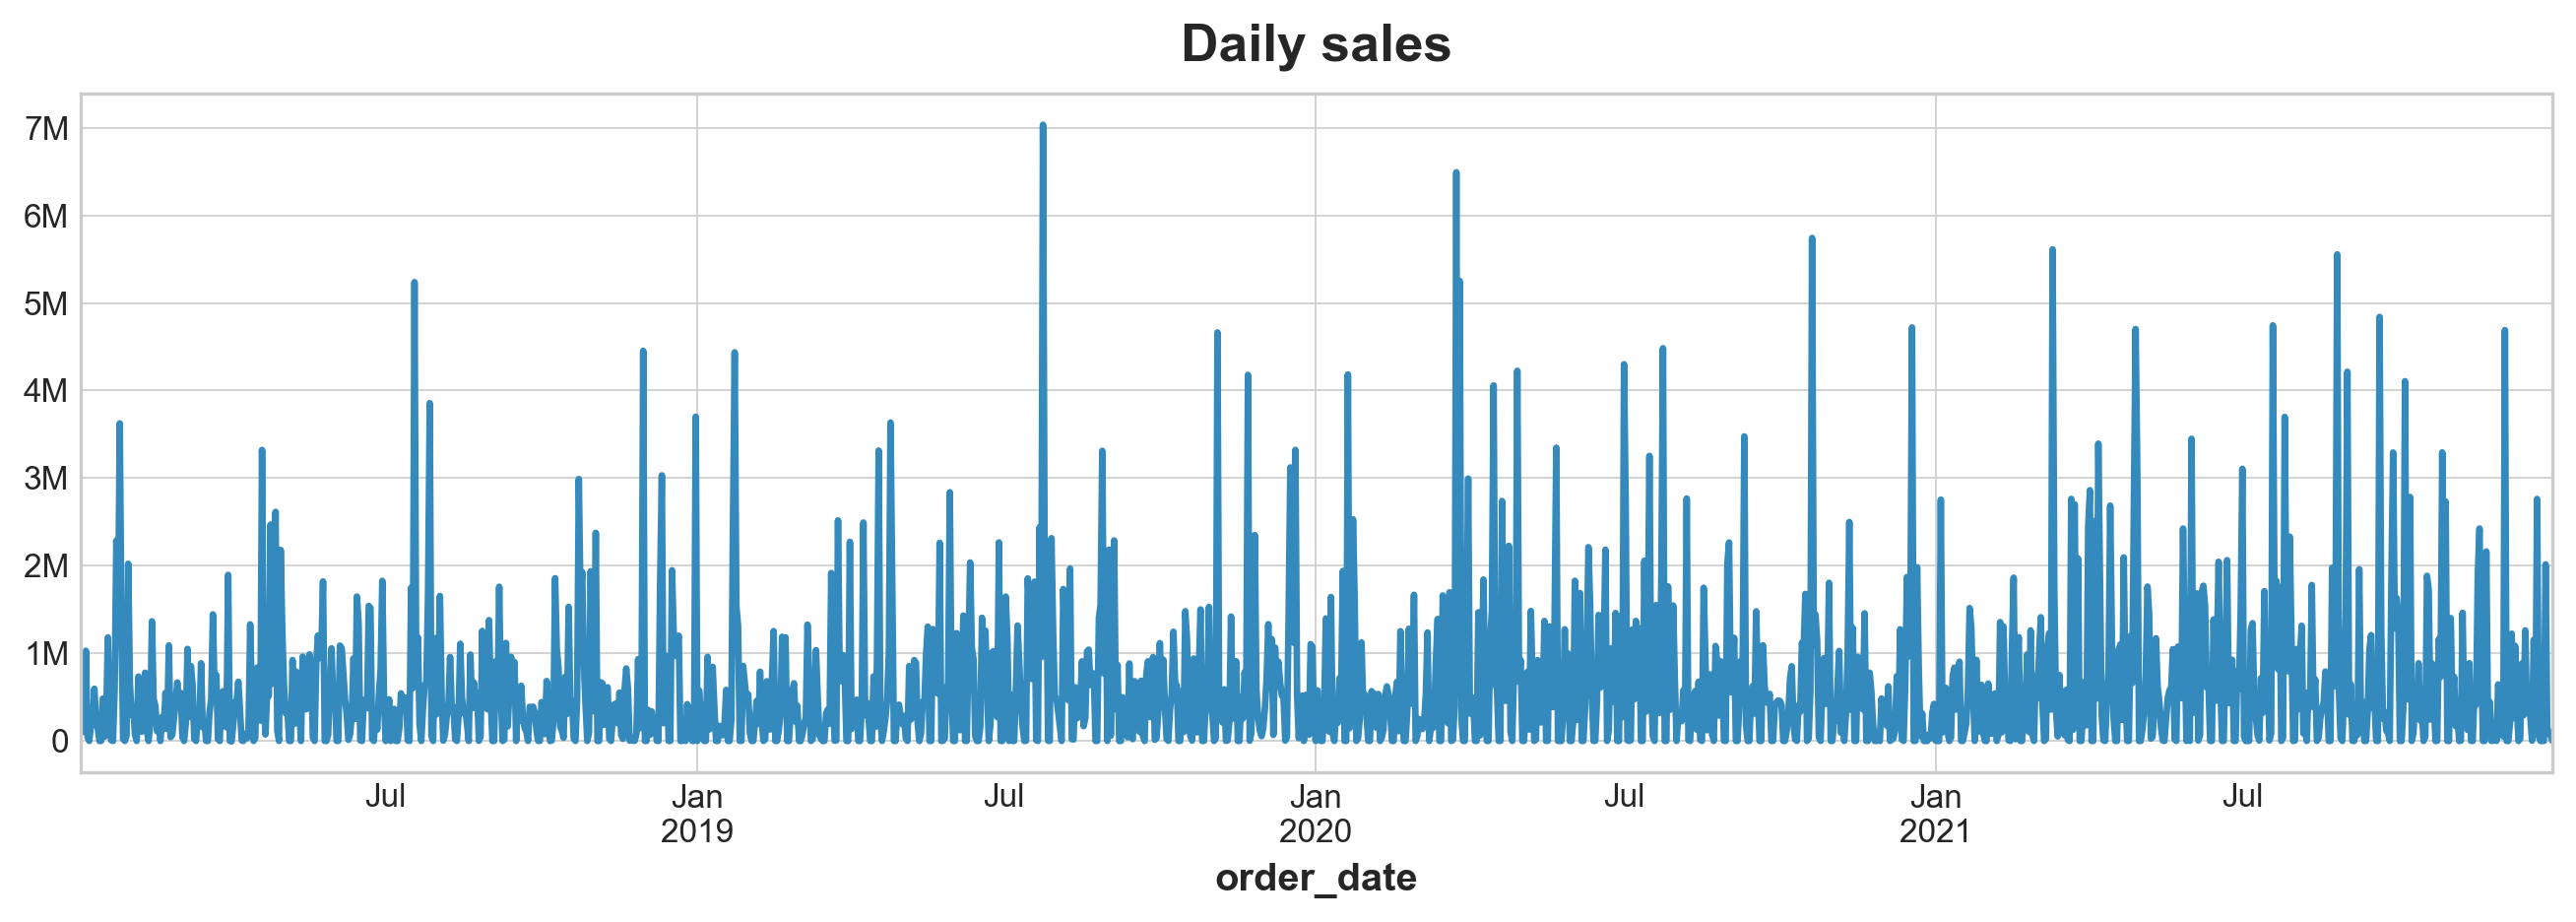

In [232]:
# show daily sales visualization
tsmd.show_ts()

This graph doesn't give us much hope. We data looks pretty noisy. We can not observe any trend or seasonality that simplify time series predictions. The sales spikes are inconsistent.

### Data evaluation

To evaluate the model performance we going to use __RMSE score__. This score calculates the absolute error. The lower is RMSE score, the better is model performance. The RMSE score should not be higher than the baseline's model score. __The baseline model__ is the model where all values are the same. In our case it is the average daily sale amount. We going to evaluate our model on the validate set to see if it has good predicting power.

In [233]:
# show the baseline value
tsmd.baseline

654835.7355890411

purchase_amount -- RMSE train: 877795
purchase_amount -- RMSE validate: 810253


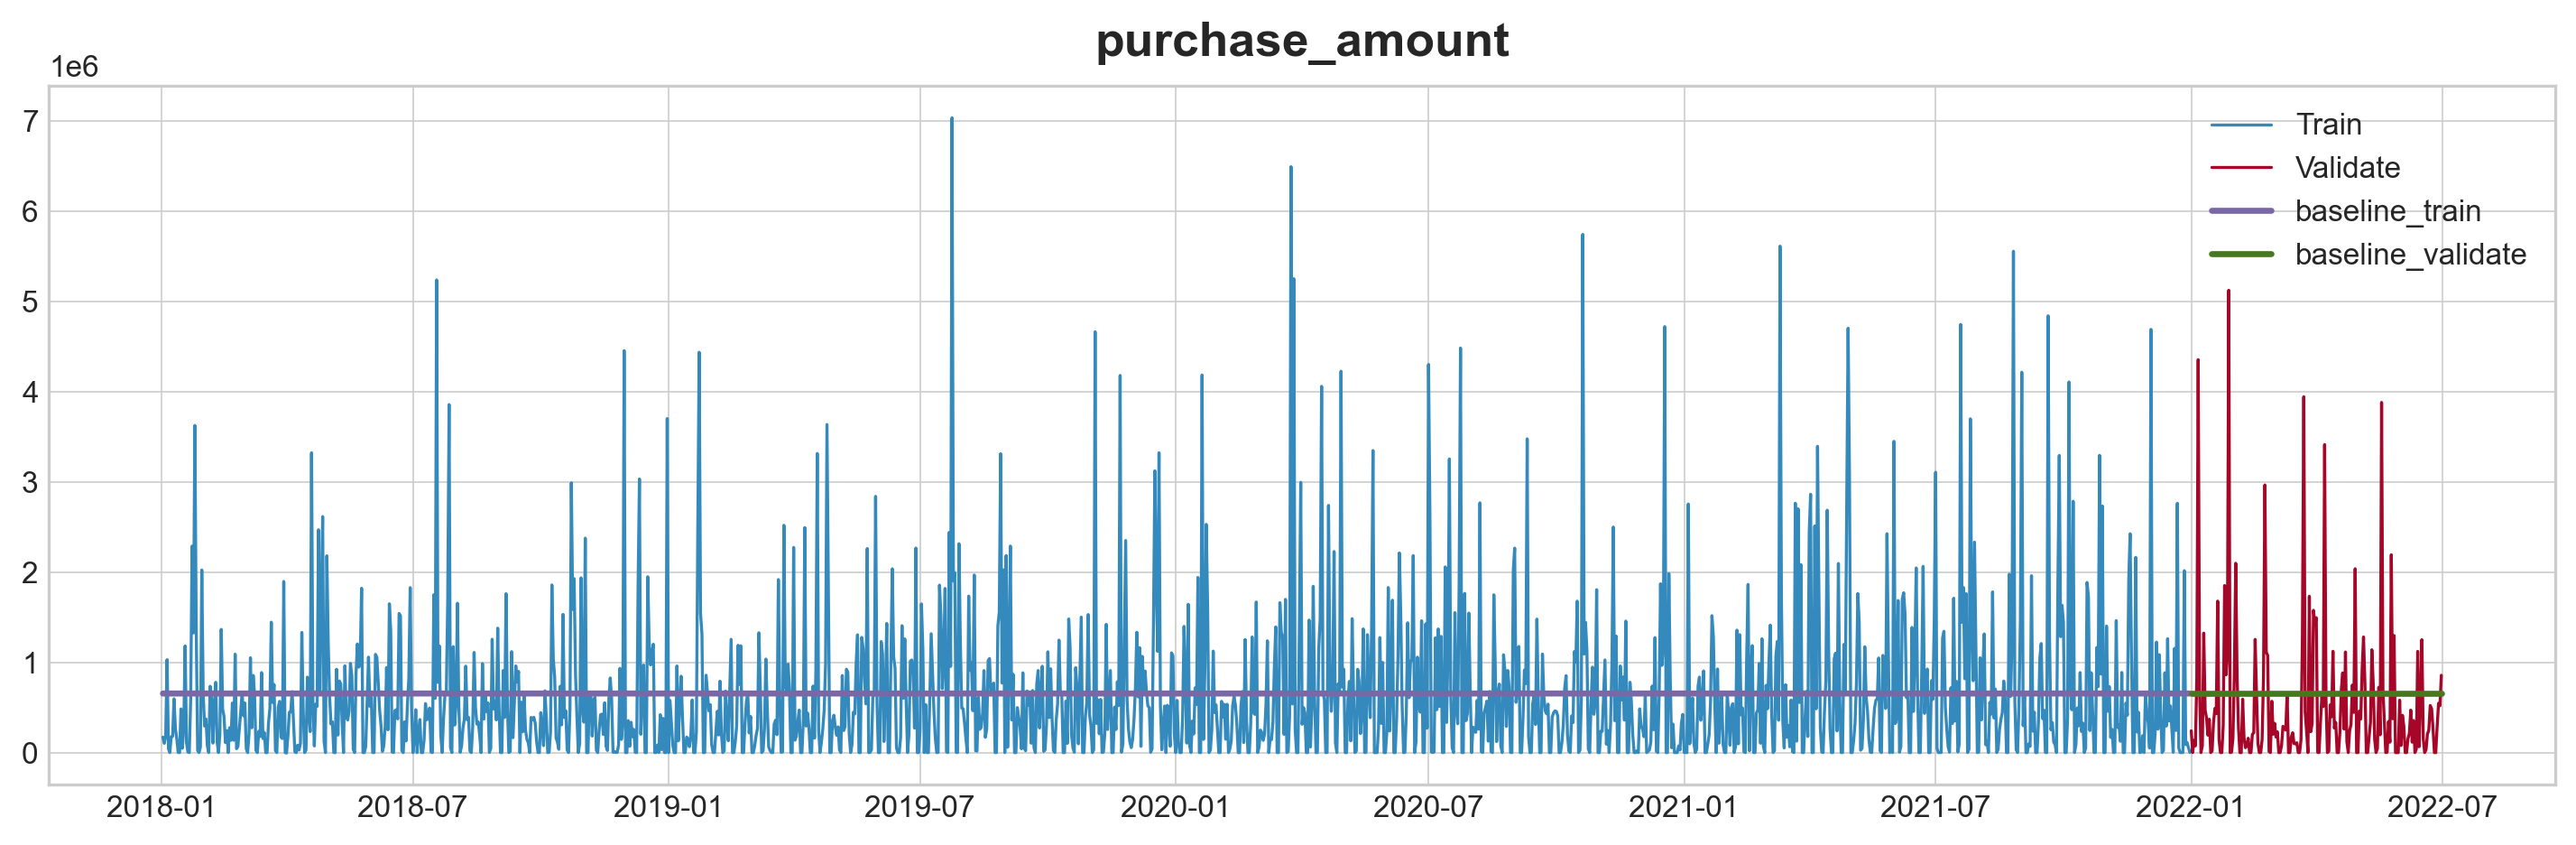

In [237]:
# evaluate and plot baseline
tsmd.evaluate()

Because we don't observe any trend in our data we can not use Holt's Linear Trend models. We decided to try ARIMA models, that rely on moving average and stationarity of the data. The results of ARIMA models you can see below.

In [238]:
# create ARIMA models and show their scores
tsmd.create_arima_models()

,model_name,train_score,validate_score
0,baseline,877795,810253
1,"ARIMA 1,0,0",None,810031
2,"ARIMA 2,0,0",None,810169
3,"ARIMA 0,0,2",None,810129
4,"ARIMA 0,0,5",None,810848


The first three models beat baseline score but just by a little bit, and they definately are not good.

Our next step was picking Deep Learning Time Series model Prophet. We set linear parameters to see if they will improve the results and used 'flat' not linear parameters as default ones. Here are the scores of all models.

In [239]:
# create Prophet models
tsmd.create_prophet()

22:11:51 - cmdstanpy - INFO - Chain [1] start processing
22:11:51 - cmdstanpy - INFO - Chain [1] done processing
22:11:51 - cmdstanpy - INFO - Chain [1] start processing
22:11:51 - cmdstanpy - INFO - Chain [1] done processing
22:11:52 - cmdstanpy - INFO - Chain [1] start processing
22:11:52 - cmdstanpy - INFO - Chain [1] done processing
22:11:52 - cmdstanpy - INFO - Chain [1] start processing
22:11:52 - cmdstanpy - INFO - Chain [1] done processing
22:11:53 - cmdstanpy - INFO - Chain [1] start processing
22:11:53 - cmdstanpy - INFO - Chain [1] done processing
22:11:53 - cmdstanpy - INFO - Chain [1] start processing
22:11:53 - cmdstanpy - INFO - Chain [1] done processing
22:11:53 - cmdstanpy - INFO - Chain [1] start processing
22:11:54 - cmdstanpy - INFO - Chain [1] done processing


In [240]:
# show scores
tsmd.scores

,model_name,train_score,validate_score
0,baseline,877795,810253
1,"ARIMA 1,0,0",None,810031
2,"ARIMA 2,0,0",None,810169
3,"ARIMA 0,0,2",None,810129
4,"ARIMA 0,0,5",None,810848
5,Prophet,770512,767104
6,Linear Prophet 0.2,766992,806324
7,Linear Prophet 0.3,766975,808088
8,Linear Prophet 0.5,766778,802545
9,Linear Prophet 0.6,766774,801071


All Prophet models beat baseline's RMSE score. The best model is the Prophet for stationary data with default parameters. Its RMSE score is lower by 43149. We are going to use it to make predictions for our test set.

22:17:04 - cmdstanpy - INFO - Chain [1] start processing
22:17:04 - cmdstanpy - INFO - Chain [1] done processing


,Baseline,Prophet
Train RMSE,"877,795.00","770,512.00"
Validate RMSE,"810,253.00","767,104.00"
Test RMSE,"586,411.40","553,131.60"


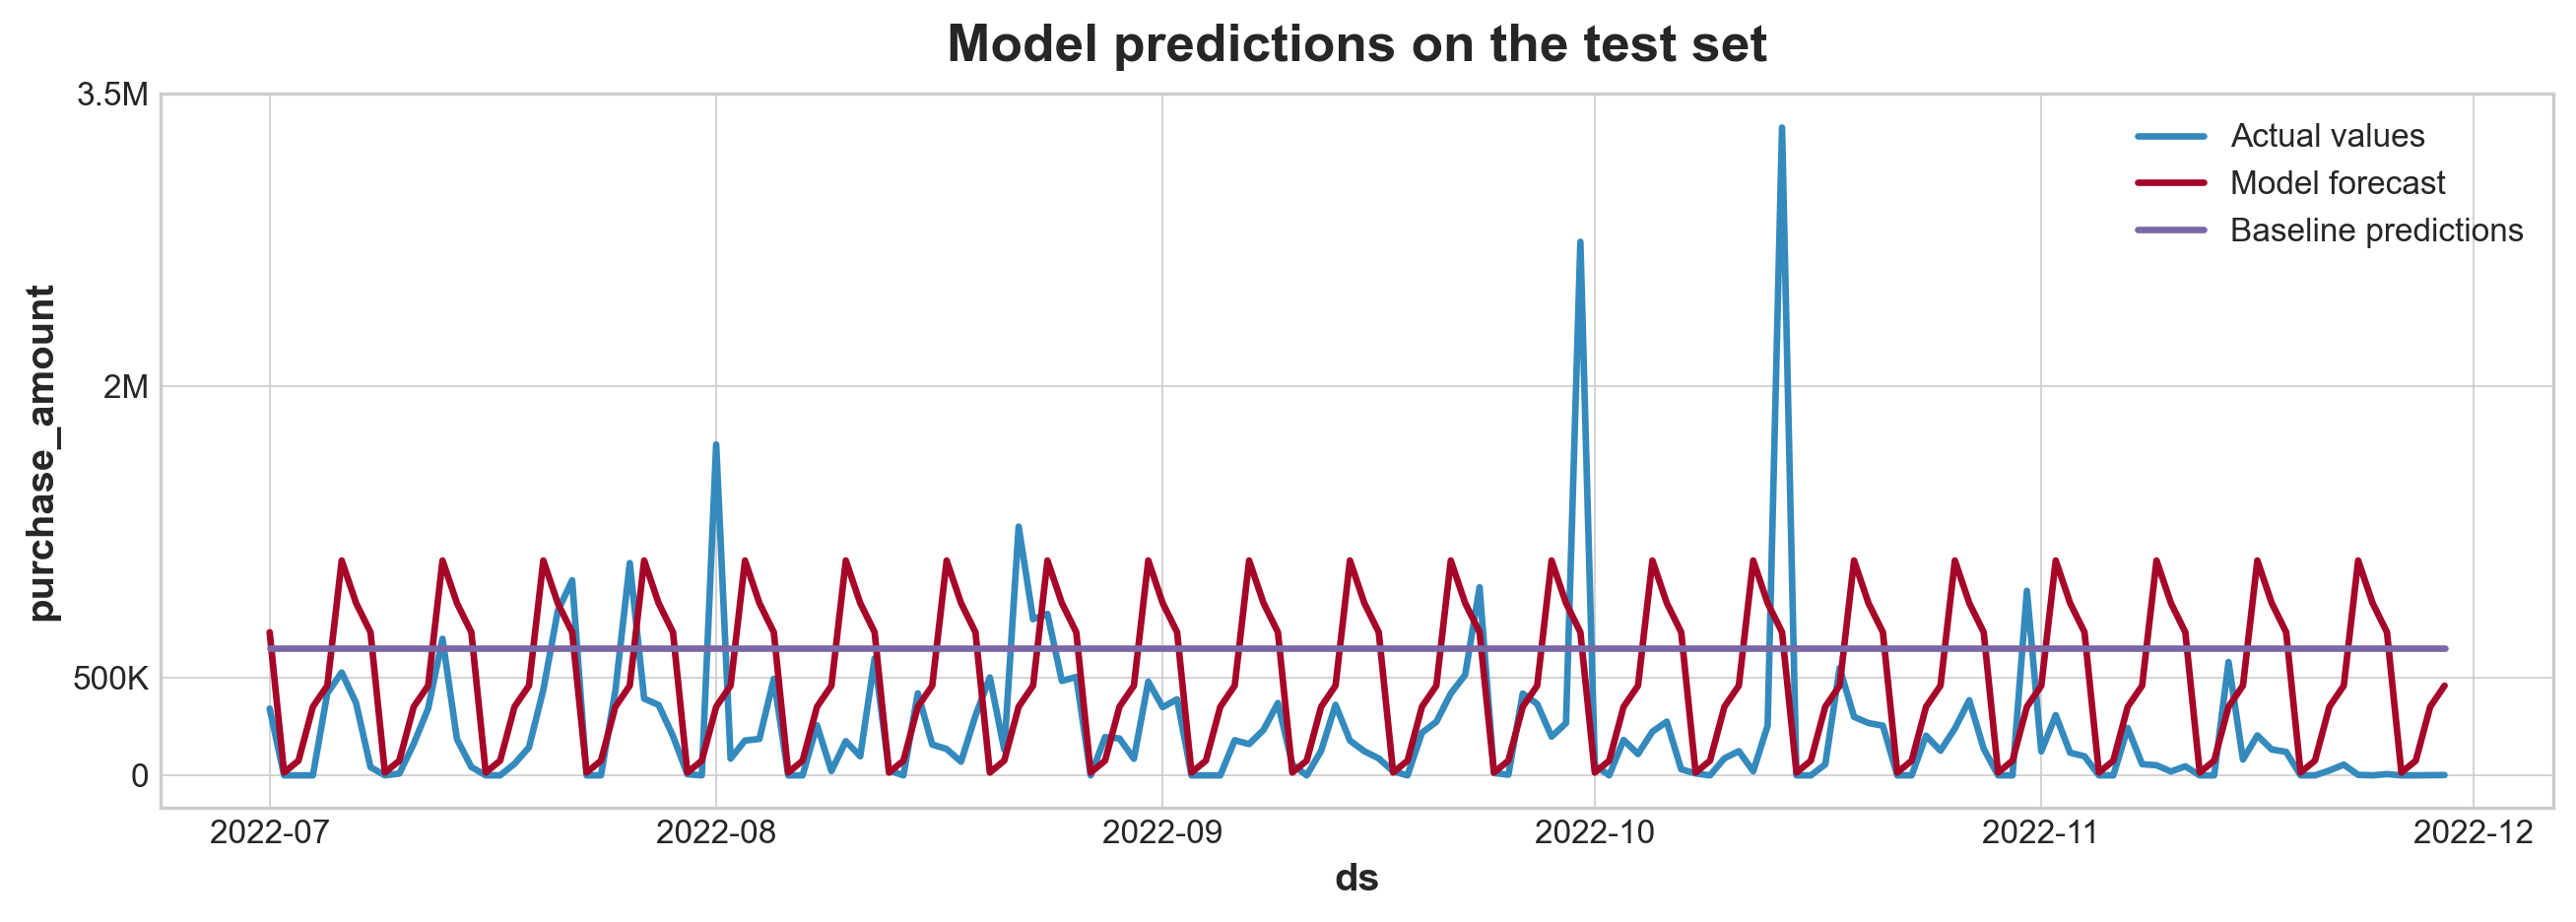

In [242]:
# show scores and predictions of the test set
tsmd.show_test()

#### Modeling summary

- Our model beats a baseline on all train, validation and test sets. Anyway, there is much more work to do. We'd like to improve results by making weekly/monthly resamples hoping find some seasonality. We'd like to remove the some pandemic sales anomalies as well. If this won't improve model performance, our next step is going to be splitting data on 5 different sets based on the customer type and mae predictions for every set.

<h3 style="color:#2596be;">Conclusions and next steps</h3> 

The goals of this project were:
- Explore the historical data of the DIR contracts with Cisco. 
- Create a model for the sales forecast of Cisco with public agencies.

Our model performs better than a baseline model but needs some improvents.

As the next step for this project we'd like to:
- create weekly/monthly resamples hoping find some seasonality and trends
- remove the some pandemic sales anomalies as well
- create regression models

or, as final step
- split data on 5 different sets based on the customer type and mae predictions for every set.